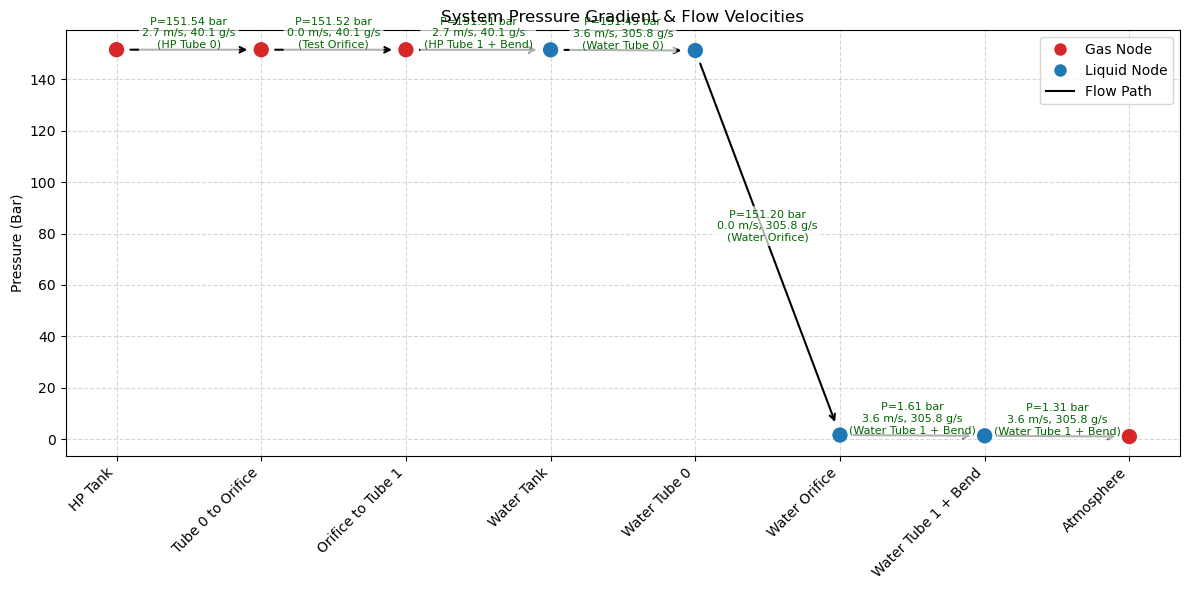

In [26]:
from flowobjects import Gas, Liquid, Tank, FlowComponent, FluidNode, plot_pressure_network, TubeComponent, dae_system, initialize_tanks, timed_valve_kv, regulator_kv

e_ss = 1.5e-6

air = Gas(name="Air",R= 287, gamma = 1.4, viscosity=1.8e-5)
water = Liquid(name="Water", density = 1000, viscosity=0.001)
    
hp_tank = Tank(name='HP Tank', volume=3.78 * 0.001 * 2, pressure = 200e5, gas=air, gas_temp=300)
hp_tube_0 = TubeComponent(name='HP Tube 0', D=0.01042, L=2, roughness=e_ss, bend_ang=0, K_extra=0)
orifice_0 = FlowComponent(name='Test Orifice', kv=3)
hp_tube_1 = TubeComponent(name='HP Tube 1 + Bend', D=0.01042, L=2, roughness=e_ss, bend_ang=45, K_extra=0.1)
water_tank = Tank(name='Water Tank', volume=0.005, mass_liquid=0.004*1000, pressure = 25e5, gas=air, gas_temp=300, liquid=water)
water_tube_0 = TubeComponent(name='Water Tube 0', D=0.01042, L=2, roughness=e_ss, bend_ang=0, K_extra=0)
water_orifice = FlowComponent(name='Water Orifice', kv=0.09)
water_tube_1= TubeComponent(name='Water Tube 1 + Bend', D=0.01042, L=2, roughness=e_ss, bend_ang=45, K_extra=0.1)

hp_tank_node = FluidNode("HP Tank", tank=hp_tank, pressure=hp_tank.pressure, temperature=hp_tank.gas_temp, fluid=hp_tank.gas)
tube0_to_orifice = FluidNode("Tube 0 to Orifice", pressure=hp_tank.pressure, temperature=hp_tank.gas_temp, fluid=hp_tank.gas) 
orifice_to_tube1 = FluidNode("Orifice to Tube 1", pressure=hp_tank.pressure, temperature=hp_tank.gas_temp, fluid=hp_tank.gas) 

water_tank_node = FluidNode("Water Tank", tank=water_tank, pressure=water_tank.pressure, temperature=water_tank.liquid_temp, fluid=water_tank.liquid)
water_tube_0_node = FluidNode("Water Tube 0", pressure=water_tank.pressure, temperature=water_tank.liquid_temp, fluid=water_tank.liquid)
water_orifice_node = FluidNode("Water Orifice", pressure=water_tank.pressure, temperature=water_tank.liquid_temp, fluid=water_tank.liquid)
water_tube_1_node = FluidNode("Water Tube 1 + Bend", pressure=water_tank.pressure, temperature=water_tank.liquid_temp, fluid=water_tank.liquid)

atmosphere_node = FluidNode("Atmosphere", pressure=101325, constant_pressure=True, temperature=300, fluid=air)

hp_tank_node.connect_nodes([(tube0_to_orifice, hp_tube_0, False)])
tube0_to_orifice.connect_nodes([(hp_tank_node, hp_tube_0, True), (orifice_to_tube1, orifice_0, False)])
orifice_to_tube1.connect_nodes([(tube0_to_orifice, orifice_0, True), (water_tank_node, hp_tube_1, False)])
water_tank_node.connect_nodes([(orifice_to_tube1, hp_tube_1, True), (water_tube_0_node, water_tube_0, False)])
water_tube_0_node.connect_nodes([(water_tank_node, water_tube_0, True), (water_orifice_node, water_orifice, False)])
water_orifice_node.connect_nodes([(water_tube_0_node, water_orifice, True), (water_tube_1_node, water_tube_1, False)])
water_tube_1_node.connect_nodes([(water_orifice_node, water_tube_1, True), (atmosphere_node, water_tube_1, False)])
atmosphere_node.connect_nodes([(water_tube_1_node, water_tube_1, True)])

total_nodes = [hp_tank_node, tube0_to_orifice, orifice_to_tube1, water_tank_node, water_tube_0_node, water_orifice_node, water_tube_1_node, atmosphere_node]
tanks = [hp_tank, water_tank]

initial_masses, initial_temperatures = initialize_tanks(tanks)

# plot_pressure_network(total_nodes)


from scipy.integrate import solve_ivp
import numpy as np


solution = solve_ivp(
    dae_system,
    t_span=(0, 5),
    y0=initial_masses,
    method='BDF',
    rtol=1e-6,
    atol=1e-9,
    args=(total_nodes, tanks),
    # t_eval=np.linspace(0, 0.5, 5)
)

plot_pressure_network(total_nodes)


c:\Users\Martin\anaconda3\envs\3.12\Lib\site-packages\scipy\integrate\_ivp\common.py:356: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]
c:\Users\Martin\anaconda3\envs\3.12\Lib\site-packages\scipy\integrate\_ivp\common.py:378: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE


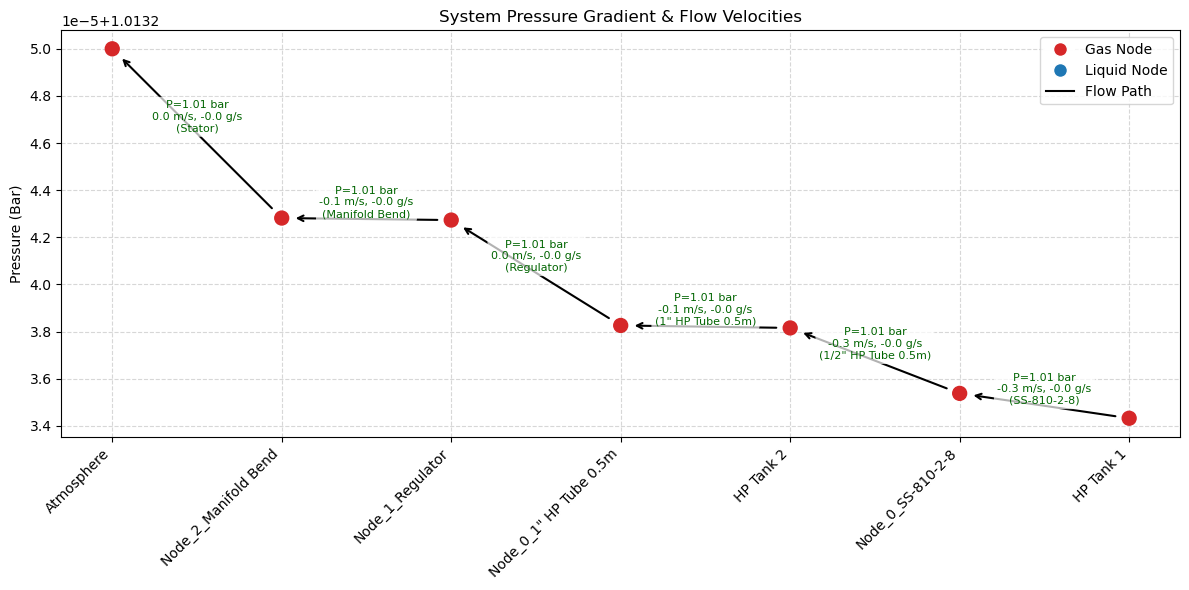

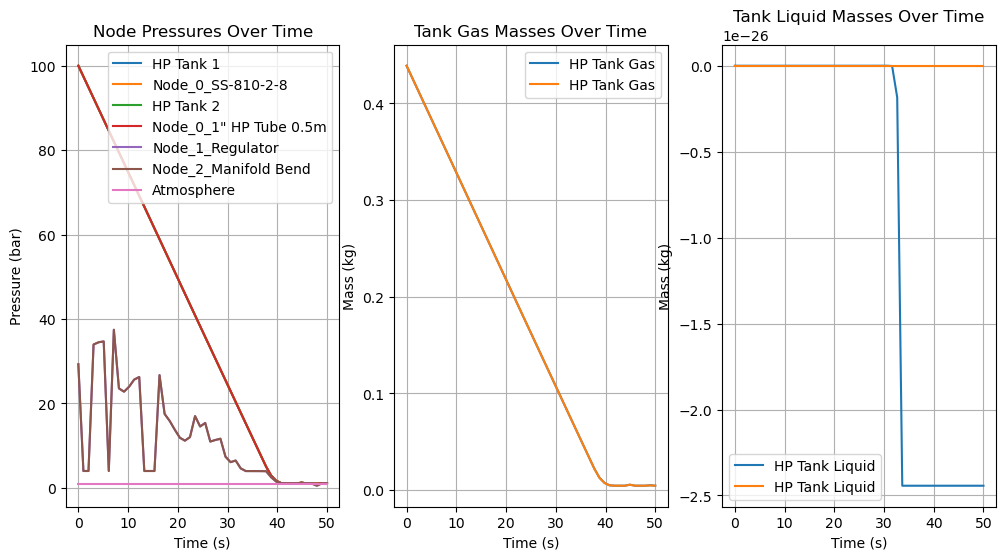

In [ ]:
from flowobjects import Gas, Liquid, Tank, FlowComponent, FluidNode, plot_pressure_network, TubeComponent, dae_system, initialize_tanks, nozzle_kv, create_series_nodes, reg_kv, solve_network_pressures, plot_transient

e_ss = 1.5e-6

air = Gas(name="Air",R= 287, gamma = 1.4, viscosity=1.8e-5)
water = Liquid(name="Water", density = 1000, viscosity=0.001)

hp_tank_1 = Tank(name='HP Tank', volume=3.78 * 0.001, pressure = 100e5, gas=air, gas_temp=300)
hp_bend_1 = TubeComponent(name='SS-810-2-8', D=0.01, L=0.05, roughness=e_ss, bend_ang=90)
hp_tube_1 = TubeComponent(name='1/2" HP Tube 0.5m', D=0.01, L=0.5, roughness=e_ss)
hp_bend_2 = TubeComponent(name='SS-810-2-8', D=0.01, L=0.05, roughness=e_ss, bend_ang=90)
hp_tank_2 = Tank(name='HP Tank', volume=3.78 * 0.001, pressure = 100e5, gas=air, gas_temp=300)
hp_tube_2 = TubeComponent(name='1" HP Tube 0.2m', D=0.022, L=0.2, roughness=e_ss)
hp_bend_3 = TubeComponent(name='SS-1610-9', D=0.022, L=0.1, roughness=e_ss, bend_ang=90)
hp_tube_3 = TubeComponent(name='1" HP Tube 0.5m', D=0.022, L=0.5, roughness=e_ss)
regulator = FlowComponent(name='Regulator', kv=lambda args: reg_kv(args, 4e5, 1.5, p_band=1e4))
lp_tube_1 = TubeComponent(name='1" LP Tube 1m', D=0.022, L=1, roughness=e_ss)
mani_bend = TubeComponent(name='Manifold Bend', D=0.022, L=0.1, roughness=e_ss, bend_ang=90)
stator = FlowComponent(name='Stator', kv=nozzle_kv(23.73e-6))

hp_tank_1_node = FluidNode("HP Tank 1", tank=hp_tank_1)
hp_tank_2_node = FluidNode("HP Tank 2", tank=hp_tank_2)
atmosphere_node = FluidNode("Atmosphere", pressure=101325, constant_pressure=True, temperature=300, fluid=air)

nodes = [hp_tank_1_node] + create_series_nodes(hp_tank_1_node, [hp_bend_1, hp_tube_1], hp_tank_2_node) + [hp_tank_2_node] + create_series_nodes(hp_tank_2_node, [hp_tube_3, regulator, mani_bend, stator], atmosphere_node) + [atmosphere_node]
tanks = [hp_tank_1, hp_tank_2]
initial_masses, initial_temperatures = initialize_tanks(tanks)


from scipy.integrate import solve_ivp
import numpy as np

t_end=50
solution = solve_ivp(
    dae_system,
    t_span=(0, t_end),
    y0=initial_masses,
    method='BDF',
    rtol=1e-6,
    atol=1e-9,
    args=(nodes, tanks),
    t_eval=np.linspace(0, t_end, 50)
)

plot_pressure_network(nodes)
plot_transient(solution, nodes, tanks)



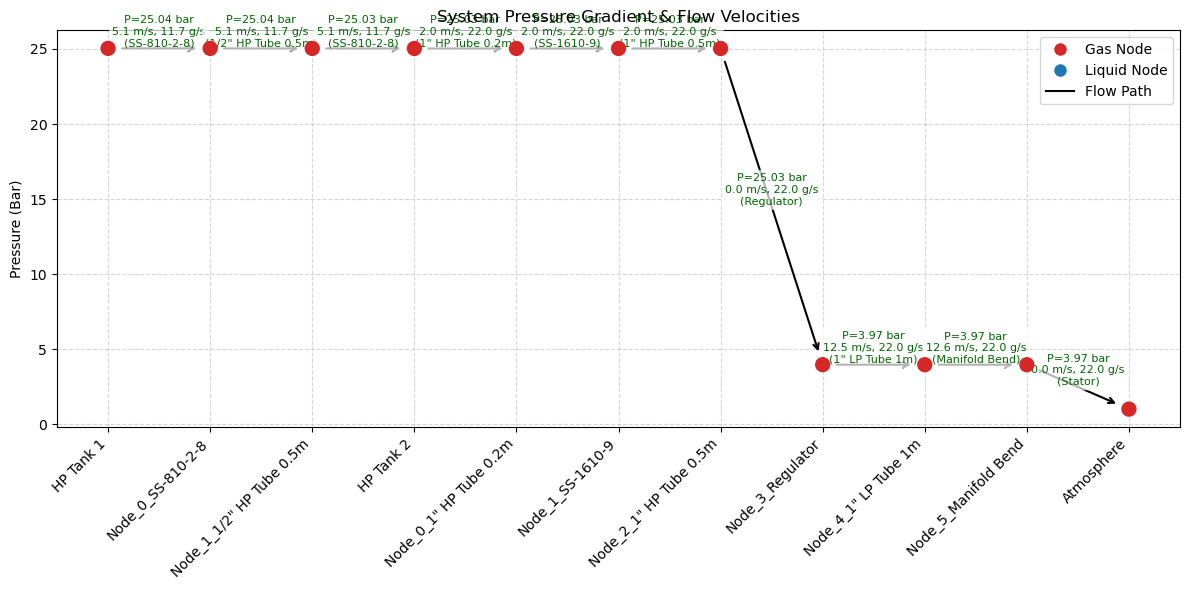

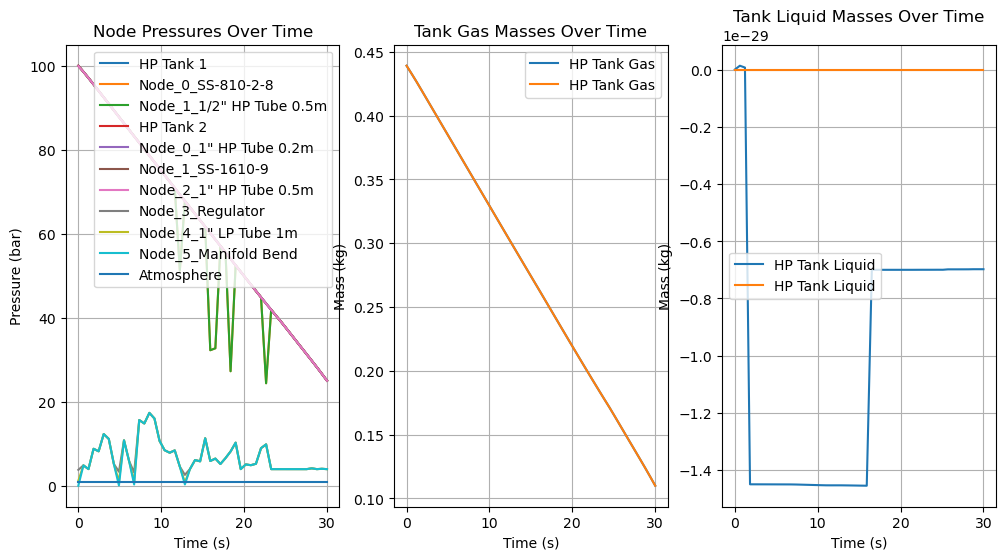

In [16]:
from flowobjects import Gas, Liquid, Tank, FlowComponent, FluidNode, plot_pressure_network, TubeComponent, dae_system, initialize_tanks, nozzle_kv, create_series_nodes, reg_kv, solve_network_pressures, plot_transient

e_ss = 1.5e-6

air = Gas(name="Air",R= 287, gamma = 1.4, viscosity=1.8e-5)
water = Liquid(name="Water", density = 1000, viscosity=0.001)

hp_tank_1 = Tank(name='HP Tank', volume=3.78 * 0.001, pressure = 100e5, gas=air, gas_temp=300)
hp_bend_1 = TubeComponent(name='SS-810-2-8', D=0.01, L=0.05, roughness=e_ss, bend_ang=90)
hp_tube_1 = TubeComponent(name='1/2" HP Tube 0.5m', D=0.01, L=0.5, roughness=e_ss)
hp_bend_2 = TubeComponent(name='SS-810-2-8', D=0.01, L=0.05, roughness=e_ss, bend_ang=90)
hp_tank_2 = Tank(name='HP Tank', volume=3.78 * 0.001, pressure = 100e5, gas=air, gas_temp=300)
hp_tube_2 = TubeComponent(name='1" HP Tube 0.2m', D=0.022, L=0.2, roughness=e_ss)
hp_bend_3 = TubeComponent(name='SS-1610-9', D=0.022, L=0.1, roughness=e_ss, bend_ang=90)
hp_tube_3 = TubeComponent(name='1" HP Tube 0.5m', D=0.022, L=0.5, roughness=e_ss)
regulator = FlowComponent(name='Regulator', kv=lambda args: reg_kv(args, 4e5, 1.5, p_band=1e4))
lp_tube_1 = TubeComponent(name='1" LP Tube 1m', D=0.022, L=1, roughness=e_ss)
mani_bend = TubeComponent(name='Manifold Bend', D=0.022, L=0.1, roughness=e_ss, bend_ang=90)
stator = FlowComponent(name='Stator', kv=nozzle_kv(23.73e-6))

hp_tank_1_node = FluidNode("HP Tank 1", tank=hp_tank_1)
hp_tank_2_node = FluidNode("HP Tank 2", tank=hp_tank_2)
atmosphere_node = FluidNode("Atmosphere", pressure=101325, constant_pressure=True, temperature=300, fluid=air)

nodes = [hp_tank_1_node] + create_series_nodes(hp_tank_1_node, [hp_bend_1, hp_tube_1, hp_bend_2], hp_tank_2_node) + [hp_tank_2_node] + create_series_nodes(hp_tank_2_node, [hp_tube_2, hp_bend_3, hp_tube_3, regulator, lp_tube_1, mani_bend, stator], atmosphere_node) + [atmosphere_node]
tanks = [hp_tank_1, hp_tank_2]
initial_masses, initial_temperatures = initialize_tanks(tanks)


from scipy.integrate import solve_ivp
import numpy as np

t_end=30
solution = solve_ivp(
    dae_system,
    t_span=(0, t_end),
    y0=initial_masses,
    method='BDF',
    rtol=1e-6,
    atol=1e-9,
    args=(nodes, tanks),
    t_eval=np.linspace(0, t_end, 50)
)

plot_pressure_network(nodes)
plot_transient(solution, nodes, tanks)



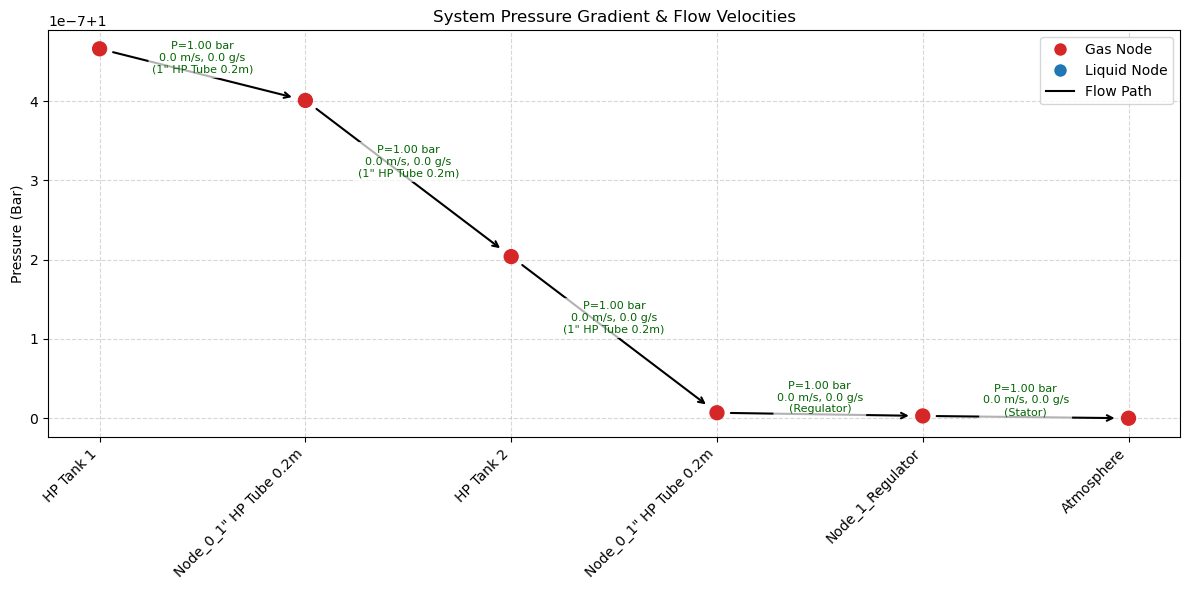

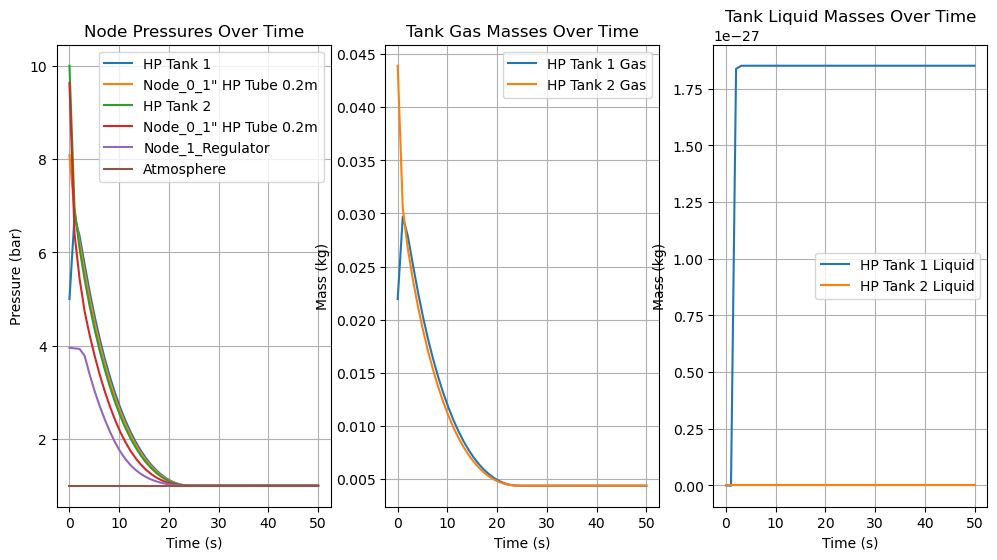

In [2]:
from flowobjects import Gas, Liquid, Tank, FlowComponent, FluidNode, plot_pressure_network, TubeComponent, dae_system, initialize_tanks, timed_valve_kv, nozzle_kv, create_series_nodes, reg_kv, solve_network_pressures, plot_transient

e_ss = 1.5e-6

air = Gas(name="Air",R= 287, gamma = 1.4, viscosity=1.8e-5)
water = Liquid(name="Water", density = 1000, viscosity=0.001)

hp_tank_1 = Tank(name='HP Tank 1', volume=3.78 * 0.001, pressure = 5e5, gas=air, gas_temp=300)
tube_1 = TubeComponent(name='1" HP Tube 0.2m', D=0.003, L=0.2, roughness=e_ss)
hp_tank_2 = Tank(name='HP Tank 2', volume=3.78 * 0.001, pressure = 10e5, gas=air, gas_temp=300)
tube_3 = TubeComponent(name='1" HP Tube 0.2m', D=0.003, L=0.2, roughness=e_ss)
reg = FlowComponent(name='Regulator', kv=lambda args: reg_kv(args, 4e5, 0.3, p_band=1e4))
stator = FlowComponent(name='Stator', kv=0.3)

hp_tank_1_node = FluidNode("HP Tank 1", tank=hp_tank_1)
hp_tank_2_node = FluidNode("HP Tank 2", tank=hp_tank_2)
atmosphere_node = FluidNode("Atmosphere", pressure=1e5, constant_pressure=True, temperature=300, fluid=air)

nodes = [hp_tank_1_node] + create_series_nodes(hp_tank_1_node, [tube_1, tube_1], hp_tank_2_node) + [hp_tank_2_node] + create_series_nodes(hp_tank_2_node, [tube_3, reg, stator], atmosphere_node) + [atmosphere_node]
tanks = [hp_tank_1, hp_tank_2]
initial_masses, initial_temperatures = initialize_tanks(tanks)


from scipy.integrate import solve_ivp
import numpy as np

t_end=50
solution = solve_ivp(
    dae_system,
    t_span=(0, t_end),
    y0=initial_masses,
    method='BDF',
    rtol=1e-6,
    atol=1e-9,
    args=(nodes, tanks),
    t_eval=np.linspace(0, t_end, 50)
)
plot_pressure_network(nodes)
plot_transient(solution, nodes, tanks)



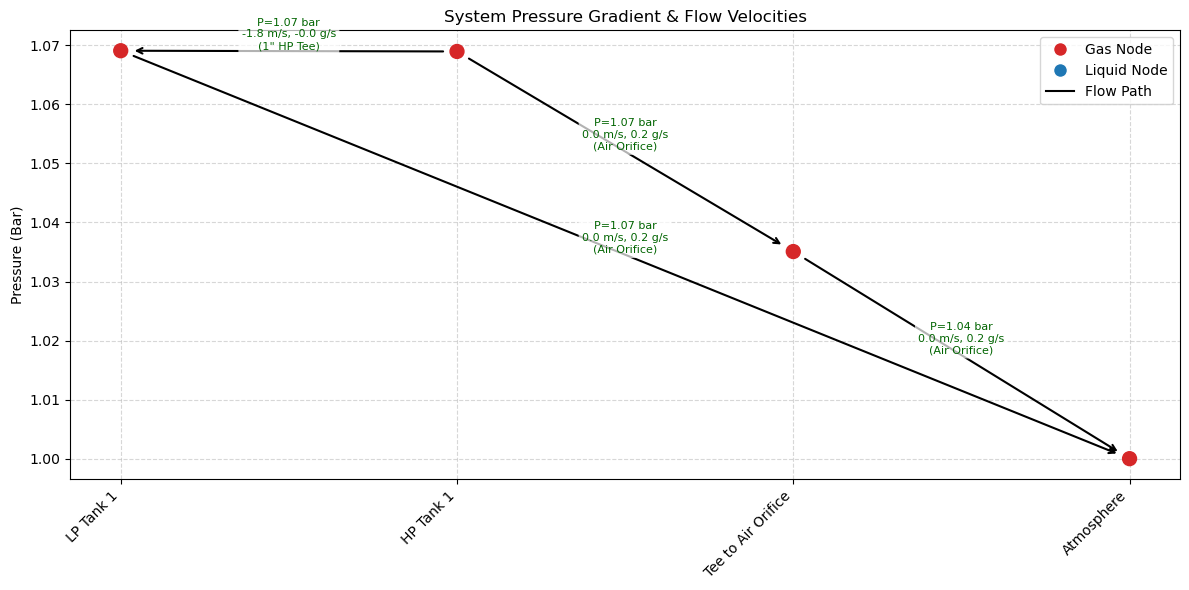

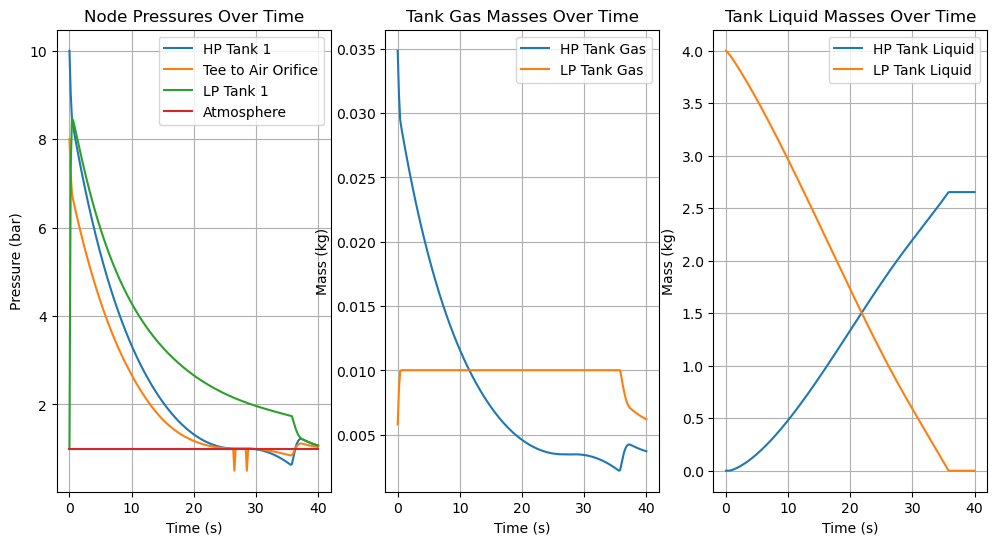

In [17]:
from flowobjects import Gas, Liquid, Tank, FlowComponent, FluidNode, plot_pressure_network, TubeComponent, dae_system, initialize_tanks, timed_valve_kv, nozzle_kv, create_series_nodes, solve_network_pressures, plot_transient

e_ss = 1.5e-6

air = Gas(name="Air",R= 287, gamma = 1.4, viscosity=1.8e-5)
water = Liquid(name="Water", density = 1000, viscosity=0.001)

hp_tank= Tank(name='HP Tank', volume=0.003, pressure = 10e5, gas=air, gas_temp=300)
tee = TubeComponent(name='1" HP Tee', D=0.003, L=0.2, roughness=e_ss)
air_orifice = FlowComponent(name='Air Orifice', kv=0.09)

lp_tank = Tank(name="LP Tank", volume = 0.005, liquid=water, mass_liquid=0.004*1000, pressure=5e5, gas=air, gas_temp=300)
water_orifice = FlowComponent(name='Water Orifice', kv=0.09)

hp_tank_node = FluidNode("HP Tank 1", tank=hp_tank)
tee_airorifice_node = FluidNode("Tee to Air Orifice")
lp_tank_node = FluidNode("LP Tank 1", tank=lp_tank)
atmosphere_node = FluidNode("Atmosphere", pressure=1e5, constant_pressure=True, temperature=300, fluid=air)

hp_tank_node.connect_nodes([(lp_tank_node, tee, False), (tee_airorifice_node, air_orifice, False)])
tee_airorifice_node.connect_nodes([(hp_tank_node, air_orifice, True), (atmosphere_node, air_orifice, False)])
lp_tank_node.connect_nodes([(hp_tank_node, tee, True), (atmosphere_node, air_orifice, False)])

nodes = [hp_tank_node, tee_airorifice_node, lp_tank_node, atmosphere_node]
tanks = [hp_tank, lp_tank]
initial_masses, initial_temperatures = initialize_tanks(tanks)


from scipy.integrate import solve_ivp
import numpy as np

t_end=40
solution = solve_ivp(
    dae_system,
    t_span=(0, t_end),
    y0=initial_masses,
    method='BDF',
    rtol=1e-6,
    atol=1e-9,
    args=(nodes, tanks),
    t_eval=np.linspace(0, t_end,200)
)
plot_pressure_network(nodes)
plot_transient(solution, nodes, tanks)



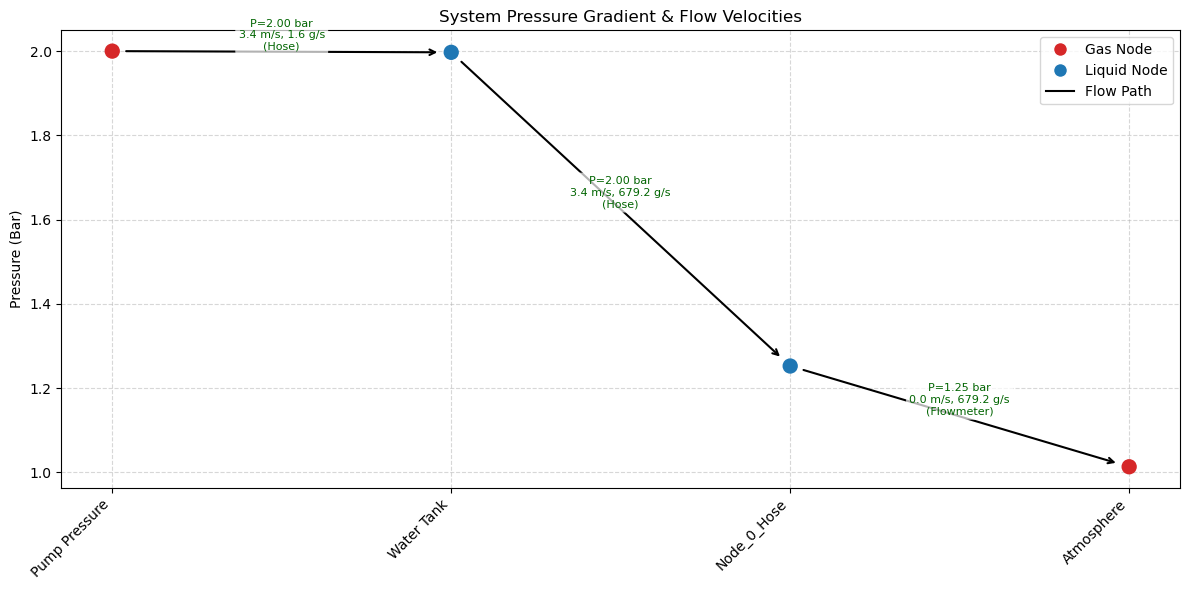

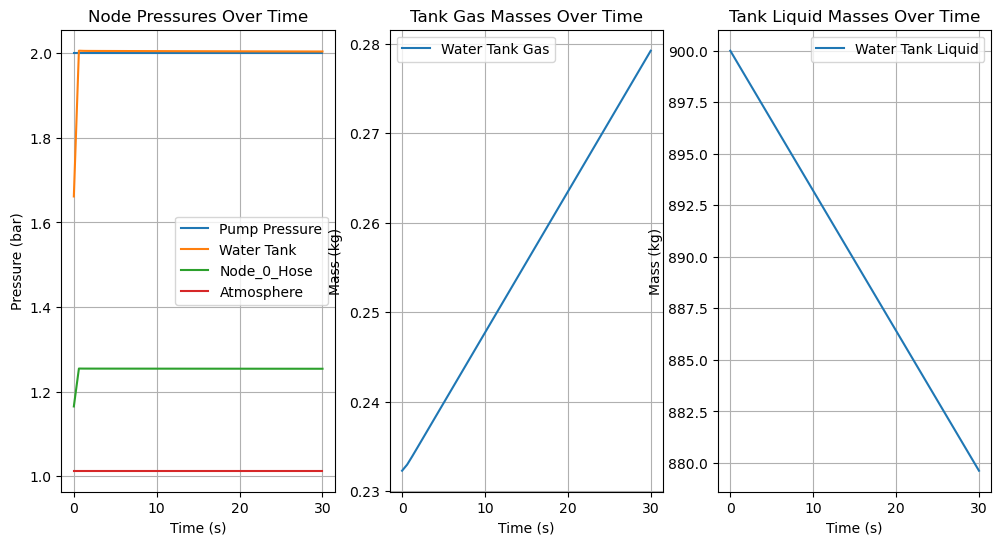

In [21]:
from flowobjects import Gas, Liquid, Tank, FlowComponent, FluidNode, plot_pressure_network, TubeComponent, dae_system, initialize_tanks, nozzle_kv, create_series_nodes, reg_kv, solve_network_pressures, plot_transient

e_ss = 1.5e-6

air = Gas(name="Air",R= 287, gamma = 1.4, viscosity=1.8e-5)
water = Liquid(name="Water", density = 1000, viscosity=0.001)

water_tank = Tank(name='Water Tank', volume=1, mass_liquid=900, liquid=water, pressure = 2e5, gas=air, gas_temp=300)
hose = TubeComponent(name='Hose', D=0.016, L=10, roughness=e_ss)
flowmeter = FlowComponent(name='Flowmeter', kv=5)


pump_pressure = FluidNode("Pump Pressure", pressure=2e5, temperature=300, fluid=air, constant_pressure=True)
water_tank_node = FluidNode("Water Tank", tank=water_tank)
atmosphere_node = FluidNode("Atmosphere", pressure=101325, constant_pressure=True, temperature=300, fluid=air)

nodes = [pump_pressure, water_tank_node] + create_series_nodes(water_tank_node, [hose, flowmeter], atmosphere_node) + [atmosphere_node]
pump_pressure.connect_nodes([(water_tank_node, hose, False)])
water_tank_node.connect_nodes([(pump_pressure, hose, True)])
tanks = [water_tank]
initial_masses, initial_temperatures = initialize_tanks(tanks)


from scipy.integrate import solve_ivp
import numpy as np

t_end=30
solution = solve_ivp(
    dae_system,
    t_span=(0, t_end),
    y0=initial_masses,
    method='BDF',
    rtol=1e-6,
    atol=1e-9,
    args=(nodes, tanks),
    t_eval=np.linspace(0, t_end, 50)
)





# import cProfile
# cProfile.run("main()", 'restats')
# import pstats
# p = pstats.Stats('restats')
# p.sort_stats('cumulative').print_stats(40)


plot_pressure_network(nodes)
plot_transient(solution, nodes, tanks)

